## Building up tVMC

In [44]:
%load_ext autoreload
%autoreload 3

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [114]:
import jax
import jax.numpy as jnp
from sampling import metropolis_step
from local_energy import get_local_energy_fn
import matplotlib.pyplot as plt

### Hydrogen superposition - relative phase beating mode

In [32]:
def f(params, x):
    """
    Wavefunction representing the superposition of the ground and first excited state of Hydrogen.
    The time dependent parameter controls the relative phase evolution.
    """
    r = jnp.linalg.norm(x)
    c1 = 1/jnp.sqrt(jnp.pi)
    c2 = 1/(4 * jnp.sqrt(2 * jnp.pi))
    return c1 * jnp.exp(-r) + c2 * jnp.exp(-r/2) * (2 - r) * jnp.exp(1j * params.squeeze())


In [136]:
batched_f = jax.vmap(f, in_axes=(None, 0))
key = jax.random.key(seed=3)
pos = jax.random.normal(key, (4200, 3))
params = jnp.array([0.315])
te = get_local_energy_fn(f, 1, 1)

In [142]:
def get_update(params, pos):
    """Gets theta dot"""
    psi = batched_f(params, pos)
    o_alpha = jax.jacfwd(lambda p: batched_f(p, pos))(params) / psi
    o_alpha_centered = o_alpha - jnp.mean(o_alpha)
    s = jnp.mean(jnp.conj(o_alpha_centered) * o_alpha_centered)
    s += 1e-6
    energy = te(params, pos)
    energy_centered = energy - jnp.mean(energy)
    F = -1j * jnp.mean(jnp.conj(o_alpha) * energy_centered)
    theta_dot = jnp.real(F)/jnp.real(s)
    
    return theta_dot

In [143]:
# Warmup steps
for i in range(10):
    pos, pmove = metropolis_step(params, batched_f, pos, key, mcmc_width=0.12)

In [144]:
dt = 0.01

In [ ]:

r_expect = []
for i in range(100):
    #pos, pmove = metropolis_step(params, batched_f, pos, key)
    theta_dot = get_update(params, pos)
    params += dt * theta_dot
    print(params)

    r = jnp.linalg.norm(pos, axis=1)
    r_exp = jnp.mean(r)
    print(r_exp)
    #r_expect.append(r_exp)
    #print(r_exp)

[0.31044987]
12.041254
[0.31044987]
12.041254
[0.31044987]
12.041254
[0.31044987]
12.041254
[0.31044987]
12.041254
[0.31044987]
12.041254
[0.31044987]
12.041254
[0.31044987]
12.041254
[0.31044987]
12.041254
[0.31044987]
12.041254
[0.31044987]
12.041254
[0.31044987]
12.041254
[0.31044987]
12.041254
[0.31044987]
12.041254
[0.31044987]
12.041254
[0.31044987]
12.041254
[0.31044987]
12.041254
[0.31044987]
12.041254
[0.31044987]
12.041254
[0.31044987]
12.041254
[0.31044987]
12.041254
[0.31044987]
12.041254
[0.31044987]
12.041254
[0.31044987]
12.041254
[0.31044987]
12.041254
[0.31044987]
12.041254
[0.31044987]
12.041254
[0.31044987]
12.041254
[0.31044987]
12.041254
[0.31044987]
12.041254
[0.31044987]
12.041254
[0.31044987]
12.041254
[0.31044987]
12.041254
[0.31044987]
12.041254
[0.31044987]
12.041254
[0.31044987]
12.041254
[0.31044987]
12.041254
[0.31044987]
12.041254
[0.31044987]
12.041254
[0.31044987]
12.041254
[0.31044987]
12.041254


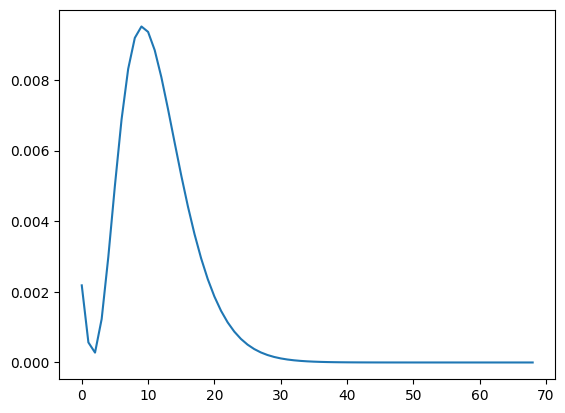

In [115]:
plt.plot(r_expect)